<a href="https://colab.research.google.com/github/oscarBarEs/machineLearnin/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLO

YOLO, which stands for "You Only Look Once," is a popular object detection algorithm that was introduced by Joseph Redmon, Santosh Divvala, Ross Girshick, and Ali Farhadi. The key idea behind YOLO is to detect objects in an image by dividing the image into a grid and predicting bounding boxes and class probabilities directly for each grid cell. This is in contrast to some other object detection algorithms that involve multiple stages or region proposals.

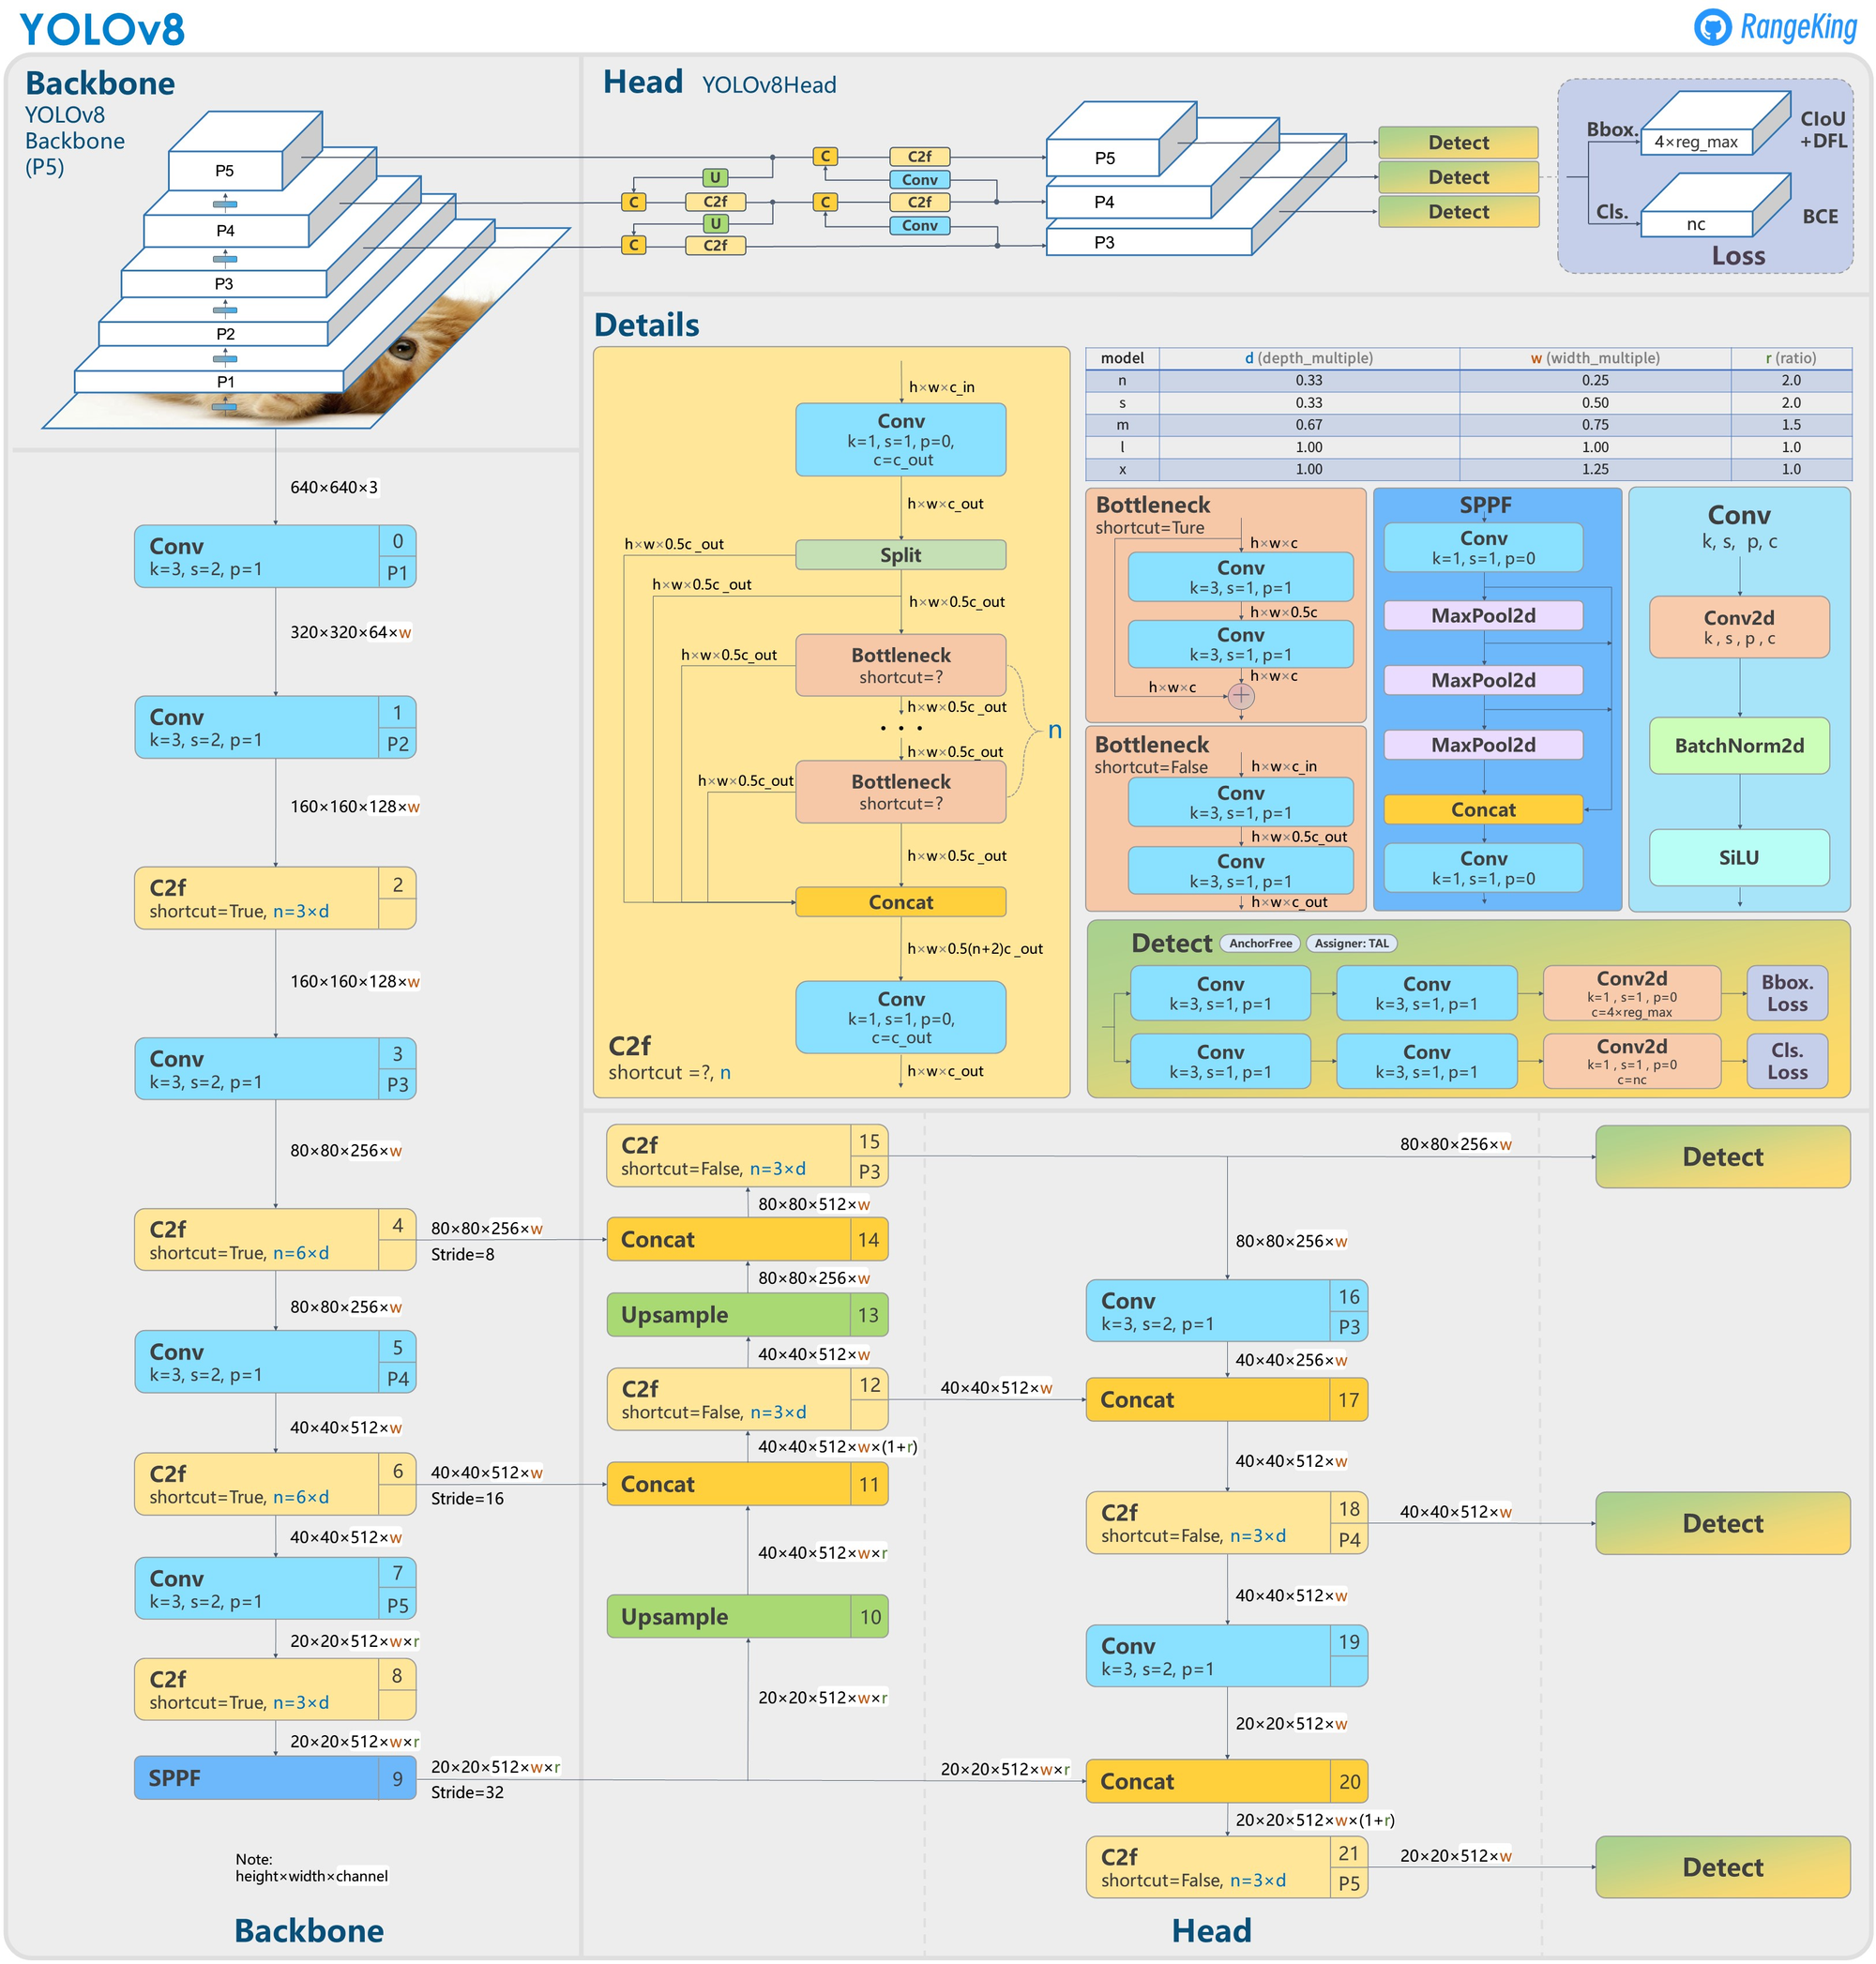

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.4/715.4 kB 7.4 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt
import tabulate
import numpy as np

In [ ]:
from ultralytics import YOLO

# Load a model
model_detection = YOLO('yolov8n.pt')  # load an official model

# Predict with the model
results = model_detection('/content/valencia.jpg',save=False, conf=0.3)  # predict on an image


image 1/1 /content/valencia.jpg: 448x640 8 persons, 3 bicycles, 4 cars, 2 traffic lights, 315.3ms
Speed: 13.6ms preprocess, 315.3ms inference, 27.0ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
object_names=results[0].names
object_names

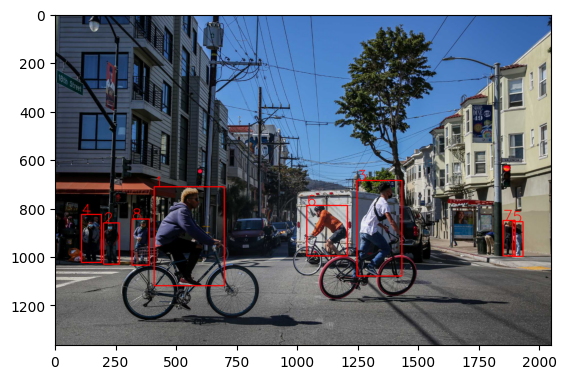

  Indx      Conf    x1    y1    x2    y2
------  --------  ----  ----  ----  ----
     1  0.89962    408   712   697  1120
     2  0.721422   200   861   265  1031
     3  0.707871  1244   686  1429  1080
     4  0.647526   109   826   191  1024
     5  0.604261  1885   856  1928   999
     6  0.565211  1037   789  1205   997
     7  0.560103  1846   851  1896   997
     8  0.511997   317   845   389  1035


In [ ]:
for result in results:

    original_image=result.orig_img
    cls = result.boxes.cls # Class object
    boxes = result.boxes.xyxy  # Boxes object for bbox outputs
    probs = result.boxes.conf  # Probs object for classification outputs
    #print(cls, boxes, probs)

    original_image=cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    data_filter=[]
    count=0
    for i in range(len(cls)):
      if cls[i]==0:
        count=count+1
        box=boxes[i].numpy()
        cv2.rectangle(original_image,(int(box[0]),int(box[1])),(int(box[2]),int(box[3])),(255,0,0),4)
        cv2.putText(original_image,str(count),(int(box[0]),int(box[1])),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),2,cv2.LINE_AA)
        data_filter.append((count,probs[i],int(box[0]),int(box[1]),int(box[2]),int(box[3])))

    plt.imshow(original_image)
    plt.show()

    print(tabulate.tabulate(data_filter, headers=["Indx","Conf","x1","y1","x2","y2"]))



In [ ]:
# Load a model
model_seg = YOLO('yolov8n-seg.pt')  # load an official model

# Predict with the model
results = model_seg('/content/valencia.jpg',save=False)


image 1/1 /content/valencia.jpg: 448x640 10 persons, 3 bicycles, 2 cars, 2 traffic lights, 223.7ms
Speed: 4.6ms preprocess, 223.7ms inference, 51.0ms postprocess per image at shape (1, 3, 448, 640)


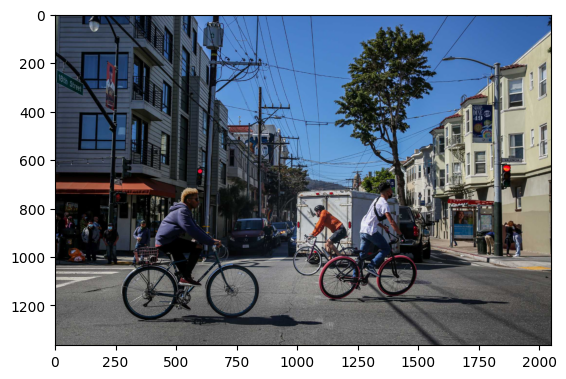

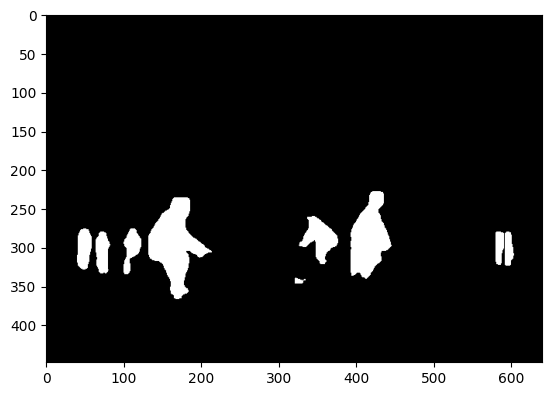

In [ ]:
for result in results:
  original_image=result.orig_img
  cls = result.boxes.cls # Class object
  masks= result.masks.data
  probs = result.boxes.conf  # Probs object for classification outputs

  original_image=cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

  filter_masks=masks[cls==0].numpy()
  filter_masks=np.max(filter_masks,0)
  mask_image=cv2.cvtColor(filter_masks, cv2.COLOR_BGR2RGB)

  plt.imshow(original_image)
  plt.show()
  plt.imshow(mask_image)
  plt.show()